# Bootcamp: Ciencia de Datos e Inteligencia Artificial

## Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad

Objetivos
Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de Machine Learning.
Generar una API que brinde predicciones como resultado a partir de datos enviados.
Proyecto
Selecciona uno de los siguientes datasets:

* Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
* Reviews de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
* Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
* Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un dataset, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

Entrena el modelo de Machine Learning, procesamiento de lenguaje natural o red neuronal que creas adecuado.

Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (ensemblings) y de ajuste de hiperparámetros o tuning para intentar mejorar la precisión y disminuir la varianza de tu modelo.
Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto.



## ELECCION DEL DATASET

### Reviews de aplicaciones de la Google Play Store

Diccionario de datos:

- 'App' : Nombre de la aplicación
- 'Category': Categoria a la que pertenece la aplicación
- 'Rating': Calificación general de los usuarios de la aplicación (como cuando se extrae).
- 'Reviews': Número de reseñas para la aplicación (como cuando se extrajeron)
- 'Size': Tamaño de la app
- 'Installs': Número de descargas/instalaciones de usuarios para la app
- 'Type': Pagada o gratis
- 'Price': Precio de la app
- 'Content Rating': Grupo de edad al que está dirigida ña aplicación: niños/mayores de 21 años/ adultos.
- 'Genres': Genero al que pertenece la app
- 'Last Updated': Última actualización
- 'Current Ver': Versión actual
- 'Android Ver': Versión android

In [2]:
#importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# librerias de advertencias
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('googleplaystore.csv')

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
#Numero de registro y numero de columnas
df.shape

(10841, 13)

In [8]:
# informacion general sobre el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Observación:

La variable 'Reviews', 'Installs', 'Size', 'Price', las tipifica como object, es importante que esas variables sean numericas.

In [9]:
#lista de las columnas
df.columns.to_list()

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [10]:
#numero de valores unicos en cada columna
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [11]:
# varlores nulos na que se pueden encontrar en las columnas.
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


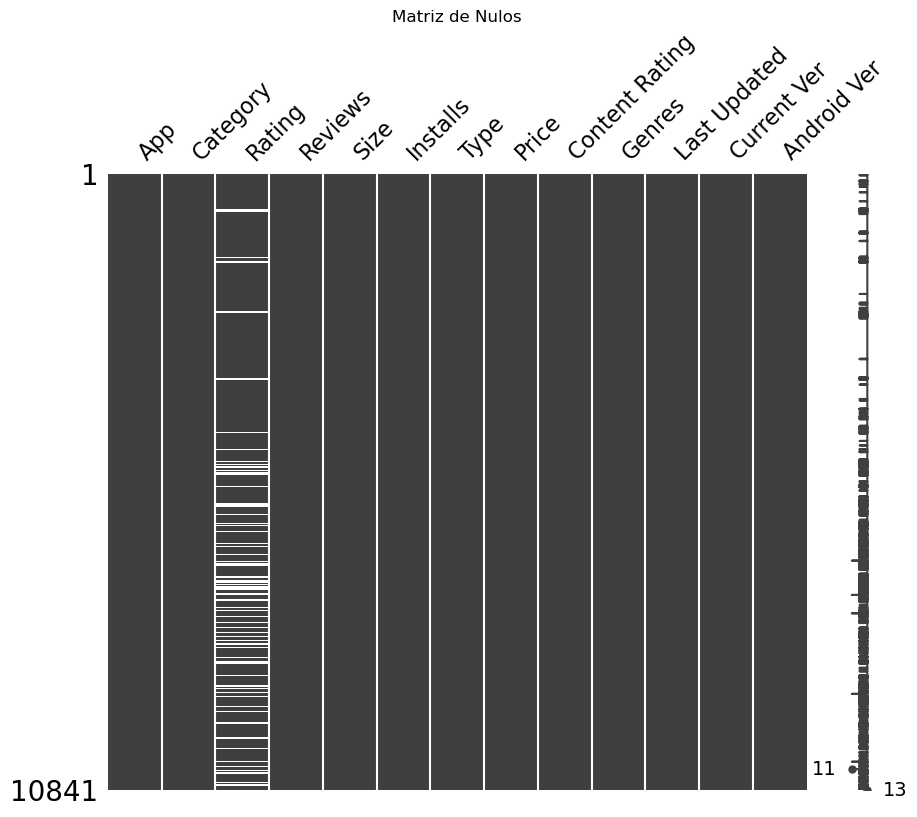

In [13]:
import missingno as msno
# Visualizar la matriz de nulos
msno.matrix(df, figsize = (10,8))
plt.title('Matriz de Nulos')
plt.show()

* En la matriz anterior puedo ver que la variable de Raiting tiene espacios en blancos, como es una variable importante imputare los datos por la mediana.
* eliminaré los valores nulos de las otras variables ya que es muy poco lo que le falta por completitud y como son categoricas no deberia en este caso tener incidencia en el valor final.

In [14]:
# Calcular el porcentaje de completitud para cada columna
completitud = (1 - df.isnull().sum() / len(df)) * 100

# Mostrar el porcentaje de completitud para cada columna
print("Porcentaje de completitud para cada columna:")
print(completitud)

Porcentaje de completitud para cada columna:
App               100.000000
Category          100.000000
Rating             86.403468
Reviews           100.000000
Size              100.000000
Installs          100.000000
Type               99.990776
Price             100.000000
Content Rating     99.990776
Genres            100.000000
Last Updated      100.000000
Current Ver        99.926206
Android Ver        99.972327
dtype: float64


In [15]:
#calcular la mediana de la columna de Rating
rating_median = df['Rating'].median()

#imputar los valores nulos por la mediana
df['Rating'].fillna(rating_median, inplace = True)

In [16]:
# elimino los valores nulos de las columnas de no estan completas
df.dropna(inplace = True)

In [17]:
# vizalizar el formato de precio
df['Price'].value_counts()

0         10032
$0.99       146
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [18]:
# ver cuantos registros estan con el signo '$'
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

797

In [19]:
# Remuevo el signo '$'
df['Price'] = df['Price'].apply(lambda x: x.replace('$', "") if '$' in str(x) else x)

In [20]:
# verifico si el signo '$' fue removido
df['Price'].value_counts()

0        10032
0.99       146
2.99       129
1.99        73
4.99        72
         ...  
19.90        1
1.75         1
14.00        1
4.85         1
1.04         1
Name: Price, Length: 92, dtype: int64

In [21]:
#conversion de el fomato de Price de object a float
df['Price'] = df['Price'].astype(float)

In [22]:
#cambio la columna de tipo object a int64 en Reviews
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [23]:
# convertir la columna size todos en bytes

#defino la funcion

def convert_size(Size):
    if isinstance(Size, str):
        if 'k' in Size:
            return float(Size.replace('k', "")) * 1024
        elif 'M' in Size:
            return float(Size.replace('M', "")) * 1024 * 1024
        elif 'Varies with device' in Size:
            return np.nan
    return Size


In [24]:
# aplico la funcion en la columna size

df['Size'] = df['Size'].apply(convert_size)

In [25]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [26]:
#Renombro la columna para recordar en que tamaño se dejaron los valores
df.rename(columns={"Size": "Size_in_bytes"}, inplace=True)

In [27]:
# limpiando la columna Installs
df['Installs'].value_counts()

1,000,000+        1578
10,000,000+       1252
100,000+          1169
10,000+           1052
1,000+             905
5,000,000+         752
100+               718
500,000+           538
50,000+            478
5,000+             476
100,000,000+       409
10+                385
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Name: Installs, dtype: int64

In [28]:
# Quitar '+'
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', "") if '+' in str(x) else x)

In [29]:
# Quitar ','
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', "") if ',' in str(x) else x)

In [30]:
# verifico los cambios
df['Installs'].value_counts()

1000000       1578
10000000      1252
100000        1169
10000         1052
1000           905
5000000        752
100            718
500000         538
50000          478
5000           476
100000000      409
10             385
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               14
Name: Installs, dtype: int64

In [31]:
#conversion de el fomato de Price de object a float
df['Installs'] = df['Installs'].astype(int)

In [32]:
# valores unicos en la columna Install
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [33]:
# Calcular el porcentaje de completitud para cada columna
completitud = (1 - df.isnull().sum() / len(df)) * 100

# Mostrar el porcentaje de completitud para cada columna
print("Porcentaje de completitud para cada columna:")
print(completitud)

Porcentaje de completitud para cada columna:
App               100.00000
Category          100.00000
Rating            100.00000
Reviews           100.00000
Size_in_bytes      84.35682
Installs          100.00000
Type              100.00000
Price             100.00000
Content Rating    100.00000
Genres            100.00000
Last Updated      100.00000
Current Ver       100.00000
Android Ver       100.00000
dtype: float64


In [34]:
#imputar los datos de la conversion de Size
# calculo la media de la columna
average_size_in_bytes = df['Size_in_bytes'].mean()

# siltro los missing values y cambio la data
df['Size_in_bytes'].fillna(average_size_in_bytes, inplace=True)

In [35]:
df['Size_in_bytes']

0        1.992294e+07
1        1.468006e+07
2        9.122611e+06
3        2.621440e+07
4        2.936013e+06
             ...     
10836    5.557453e+07
10837    3.774874e+06
10838    9.961472e+06
10839    2.258066e+07
10840    1.992294e+07
Name: Size_in_bytes, Length: 10829, dtype: float64

In [36]:
#verifico el porcentaje de completitud
completitud = (1 - df.isnull().sum() / len(df)) * 100

# Mostrar el porcentaje de completitud para cada columna
print("Porcentaje de completitud para cada columna:")
print(completitud)

Porcentaje de completitud para cada columna:
App               100.0
Category          100.0
Rating            100.0
Reviews           100.0
Size_in_bytes     100.0
Installs          100.0
Type              100.0
Price             100.0
Content Rating    100.0
Genres            100.0
Last Updated      100.0
Current Ver       100.0
Android Ver       100.0
dtype: float64


In [37]:
#reviso los tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int64  
 4   Size_in_bytes   10829 non-null  float64
 5   Installs        10829 non-null  int64  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [38]:
#estadistica descriptiva de la variables numericas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,10829.0,4.206510e+00,4.804673e-01,1.0,4.1,4.3,4.5,5.000000e+00
Reviews,10829.0,4.446018e+05,2.929213e+06,0.0,38.0,2100.0,54815.0,7.815831e+07
Size_in_bytes,10829.0,2.258066e+07,2.175952e+07,8704.0,6186598.4,18874368.0,27262976.0,1.048576e+08
Installs,10829.0,1.547990e+07,8.507114e+07,0.0,5000.0,100000.0,5000000.0,1.000000e+09
Price,10829.0,1.028091e+00,1.595778e+01,0.0,0.0,0.0,0.0,4.000000e+02


hola a todo mundo prbando